<a href="https://colab.research.google.com/github/PaulToronto/Stanford-Andrew-Ng-Machine-Learning-Specialization/blob/main/1_3_1_1_Lab_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab - Classification

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import copy
import math

from sklearn.linear_model import LinearRegression

## Toy Datasets

In [2]:
data1 = pd.DataFrame({
        'x': [0, 1, 2, 3, 4, 5],
        'y': [0, 0, 0, 1, 1, 1]
})

data1

,x,y
0,0,0
1,1,0
2,2,0
3,3,1
4,4,1
5,5,1


In [3]:
x_train1 = data1.drop('y', axis=1).values
y_train1 = data1['y'].values
x_train1, y_train1

(array([[0],
        [1],
        [2],
        [3],
        [4],
        [5]]),
 array([0, 0, 0, 1, 1, 1]))

In [4]:
model1 = LinearRegression()
model1.fit(x_train1, y_train1)
w_best1 = model1.coef_
b_best1 = model1.intercept_
w_best1, b_best1

(array([0.25714286]), -0.1428571428571428)

In [5]:
data2 = pd.DataFrame({
    'x1': [0.5, 1, 1.5, 3, 2, 1],
    'x2': [1.5, 1, 0.5, 0.5, 2, 2.5],
    'y': [0, 0, 0, 1, 1, 1]
})

data2

,x1,x2,y
0,0.5,1.5,0
1,1.0,1.0,0
2,1.5,0.5,0
3,3.0,0.5,1
4,2.0,2.0,1
5,1.0,2.5,1


In [6]:
x_train2 = data2.drop('y', axis=1).values
y_train2 = data2['y'].values
x_train2, y_train2

(array([[0.5, 1.5],
        [1. , 1. ],
        [1.5, 0.5],
        [3. , 0.5],
        [2. , 2. ],
        [1. , 2.5]]),
 array([0, 0, 0, 1, 1, 1]))

In [7]:
model2 = LinearRegression()
model2.fit(x_train2, y_train2)
w_best2 = model2.coef_
b_best2 = model2.intercept_
w_best2, b_best2

(array([0.58646617, 0.56390977]), -1.1315789473684208)

## Classification Problems

The examples in this notebook are **binary classification** problems.

Plots of classification data sets often use symbols to indicate the outcome of an example. In the plots below, 'X' is used to represent the positive values while 'O' represents negative outcomes.

### Visualization

In [8]:
pos1 = (y_train1 == 1)
neg1 = (y_train1 == 0)
pos1, neg1

(array([False, False, False,  True,  True,  True]),
 array([ True,  True,  True, False, False, False]))

In [9]:
pos2 = (y_train2 == 1)
neg2 = (y_train2 == 0)
pos2, neg2

(array([False, False, False,  True,  True,  True]),
 array([ True,  True,  True, False, False, False]))

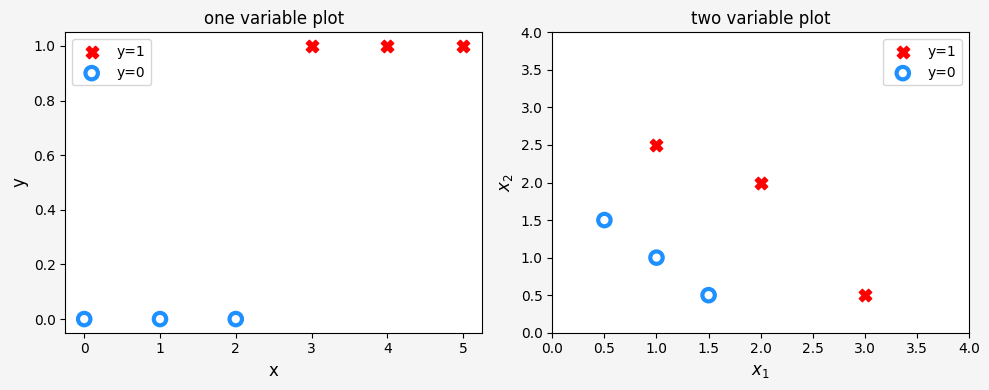

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
fig.set_facecolor('whitesmoke')

# plot data1
ax[0].scatter(x_train1[pos1], y_train1[pos1],
              marker='X', s=80, c='red', label='y=1')
ax[0].scatter(x_train1[neg1], y_train1[neg1],
              marker='o', s=80, facecolors='none',
              edgecolor='dodgerblue', lw=3, label='y=0')
ax[0].set_xlabel('x', fontsize=12)
ax[0].set_ylabel('y', fontsize=12)
ax[0].set_title('one variable plot')
ax[0].legend()

# plot data2
ax[1].scatter(x_train2[pos2, 0], x_train2[pos2, 1],
              marker='X', s=80, c='red', label='y=1')
ax[1].scatter(x_train2[neg2, 0], x_train2[neg2, 1],
              marker='o', s=80, facecolors='none',
              edgecolor='dodgerblue', lw=3, label='y=0')
ax[1].axis([0, 4, 0, 4])
ax[1].set_xlabel('$x_1$', fontsize=12)
ax[1].set_ylabel('$x_2$', fontsize=12)
ax[1].set_title('two variable plot')
ax[1].legend()

plt.tight_layout()
plt.show()

Notes about the plots above:

- In the single variable plot, positive results are shown both a red 'X's and as y=1. Negative results are blue 'O's and are located at y=0.
 - Recall in the case of linear regression, y would not have been limited to two values but could have been any value.
- In the two-variable plot, the y axis is not available.  Positive results are shown as red 'X's, while negative results use the blue 'O' symbol.
 - Recall in the case of linear regression with multiple variables, y would not have been limited to two values and a similar plot would have been three-dimensional.

## Linear regression approach

### Functions

In [11]:
def compute_cost_matrix(X, y, w, b, verbose=False):
    """
    Computes the gradient for linear regression
     Args:
      X : (array_like Shape (m,n)) variable such as house size
      y : (array_like Shape (m,)) actual value
      w : (array_like Shape (n,)) parameters of the model
      b : (scalar               ) parameter of the model
      verbose : (Boolean) If true, print out intermediate value f_wb
    Returns
      cost: (scalar)
    """
    m,n = X.shape

    # calculate f_wb for all examples.
    f_wb = X @ w + b
    # calculate cost
    total_cost = (1/(2*m)) * np.sum((f_wb-y)**2)

    if verbose: print("f_wb:")
    if verbose: print(f_wb)

    return total_cost

In [12]:
def compute_gradient_matrix(X, y, w, b):
    """
    Computes the gradient for linear regression

    Args:
      X : (array_like Shape (m,n)) variable such as house size
      y : (array_like Shape (m,1)) actual value
      w : (array_like Shape (n,1)) Values of parameters of the model
      b : (scalar )                Values of parameter of the model
    Returns
      dj_dw: (array_like Shape (n,1)) The gradient of the cost w.r.t. the parameters w.
      dj_db: (scalar)                The gradient of the cost w.r.t. the parameter b.

    """
    m,n = X.shape
    f_wb = X @ w + b
    err = f_wb - y
    dj_dw  = (1/m) * (X.T @ err)
    dj_db  = (1/m) * np.sum(err)

    return dj_db,dj_dw

In [13]:
def gradient_descent(X, y, w_in, b_in, f_cost, f_gradient, alpha, num_iters):
    """
    Performs batch gradient descent to learn w and b. Updates w and b by taking
    num_iters gradient steps with learning rate alpha

    Args:
      X (ndarray (m,n))   : Data, m examples with n features
      y (ndarray (m,))    : target values
      w_in (ndarray (n,)) : initial model parameters
      b_in (scalar)       : initial model parameter
      cost_function       : function to compute cost
      gradient_function   : function to compute the gradient
      alpha (float)       : Learning rate
      num_iters (int)     : number of iterations to run gradient descent

    Returns:
      w (ndarray (n,)) : Updated values of parameters
      b (scalar)       : Updated value of parameter
    """
    J_history = []
    w = copy.deepcopy(w_in) # avoid modify global w within function
    b = b_in

    for i in range(num_iters):
        # calculate the gradient
        dj_db, dj_dw = f_gradient(X, y, w, b)
        collect_w = []

        # update the parameters
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        if i < 100_000: # prevent resource exhaustion
            J_history.append(f_cost(X, y, w, b))

        # print cost
        if i % math.ceil(num_iters / 10) == 0:
            print(f'Iteration {i:4d}: Cost {J_history[-1]:8.2f}: w {w}: b {b}')

    return w, b, J_history

In [14]:
def run_gradient_descent(X, y, alpha, iterations):
    m, n = X.shape
    initial_w = np.zeros(n)
    initial_b = 0

    w, b, j_hist = gradient_descent(X,
                                    y,
                                    initial_w,
                                    initial_b,
                                    compute_cost_matrix,
                                    compute_gradient_matrix,
                                    alpha,
                                    iterations)

    return w, b, j_hist

### Run gradient descent

In [15]:
w_out1, b_out1, hist1 = run_gradient_descent(x_train1,
                                             y_train1,
                                             alpha=1e-1,
                                             iterations=1000)

Iteration    0: Cost     0.03: w [0.2]: b 0.05
Iteration  100: Cost     0.03: w [0.25442471]: b -0.13321187206935722
Iteration  200: Cost     0.03: w [0.25700743]: b -0.1423765760031249
Iteration  300: Cost     0.03: w [0.25713611]: b -0.1428331990502491
Iteration  400: Cost     0.03: w [0.25714252]: b -0.14285594987871794
Iteration  500: Cost     0.03: w [0.25714284]: b -0.1428570834180767
Iteration  600: Cost     0.03: w [0.25714286]: b -0.14285713989564536
Iteration  700: Cost     0.03: w [0.25714286]: b -0.1428571427095889
Iteration  800: Cost     0.03: w [0.25714286]: b -0.14285714284979112
Iteration  900: Cost     0.03: w [0.25714286]: b -0.14285714285677656


In [16]:
w_best1, w_out1 # close

(array([0.25714286]), array([0.25714286]))

In [17]:
b_best1, b_out1

(-0.1428571428571428, -0.142857142857124)

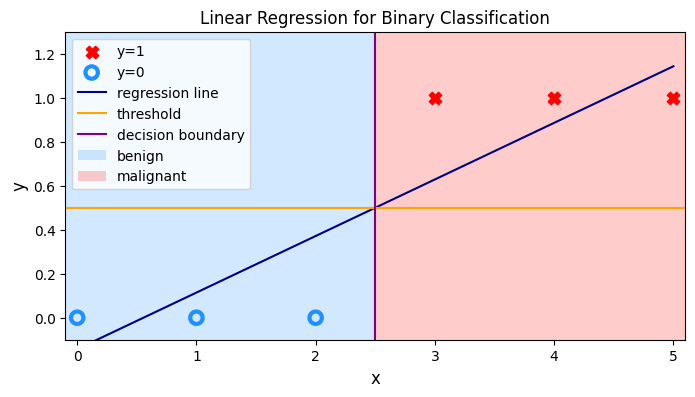

In [18]:
# plot data points
xmin = -0.1
xmax = 5.1
ymin = -0.1
ymax = 1.3

plt.figure(figsize=(8, 4))
plt.scatter(x_train1[pos1], y_train1[pos1],
              marker='X', s=80, c='red', label='y=1')
plt.scatter(x_train1[neg1], y_train1[neg1],
            marker='o', s=80, label='y=0', facecolors='none',
            edgecolor='dodgerblue', lw=3)

# plot regression line
regression_line = x_train1 @ w_out1 + b_out1
plt.plot(x_train1, regression_line, c='navy', label='regression line')

# plot threshold
plt.axhline(0.5, c='orange', label='threshold')

# decision boundary
decision_boundary = (0.5 - b_out1) / w_out1[0]
plt.axvline(decision_boundary, c='purple', label='decision boundary')
plt.fill_betweenx((ymin, ymax),
                  xmin, decision_boundary,
                  facecolor='dodgerblue',
                  alpha=0.2, label='benign')
plt.fill_betweenx((ymin, ymax),
                  decision_boundary, xmax,
                  facecolor='red',
                  alpha=0.2, label='malignant')

plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Linear Regression for Binary Classification')
plt.legend()

plt.show()

### What happens when we add a training example?

In [19]:
new_row = pd.DataFrame({'x':[15], 'y':[1]})
data1_new = pd.concat([data1, new_row], axis=0, ignore_index=True)
data1_new

,x,y
0,0,0
1,1,0
2,2,0
3,3,1
4,4,1
5,5,1
6,15,1


In [20]:
x_train1_new = data1_new.drop('y', axis=1).values
y_train1_new = data1_new['y'].values
x_train1_new, y_train1_new

(array([[ 0],
        [ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [15]]),
 array([0, 0, 0, 1, 1, 1, 1]))

In [21]:
pos1_new = (y_train1_new == 1)
neg1_new = (y_train1_new == 0)
pos1_new, neg1_new

(array([False, False, False,  True,  True,  True,  True]),
 array([ True,  True,  True, False, False, False, False]))

In [22]:
w_out1_new, b_out1_new, hist1_new = run_gradient_descent(x_train1_new,
                                                         y_train1_new,
                                                         alpha=1e-3,
                                                         iterations=10000)

Iteration    0: Cost     0.27: w [0.00385714]: b 0.0005714285714285714
Iteration 1000: Cost     0.08: w [0.08302838]: b 0.12730552036220855
Iteration 2000: Cost     0.08: w [0.0756005]: b 0.1957058938299577
Iteration 3000: Cost     0.08: w [0.07124908]: b 0.2357763411521121
Iteration 4000: Cost     0.08: w [0.06869992]: b 0.25925049293221303
Iteration 5000: Cost     0.08: w [0.06720657]: b 0.2730021687586656
Iteration 6000: Cost     0.08: w [0.06633173]: b 0.28105820374588736
Iteration 7000: Cost     0.08: w [0.06581923]: b 0.28577760671425156
Iteration 8000: Cost     0.08: w [0.065519]: b 0.2885423370577933
Iteration 9000: Cost     0.08: w [0.06534311]: b 0.2901619770681371


In [23]:
model1_new = LinearRegression()
model1_new.fit(x_train1_new, y_train1_new)

LinearRegression()

In [24]:
w_out1_new, model1_new.coef_ # close

(array([0.06524015]), array([0.06509434]))

In [25]:
b_out1_new, model1_new.intercept_ # close

(0.291110080077581, 0.29245283018867935)

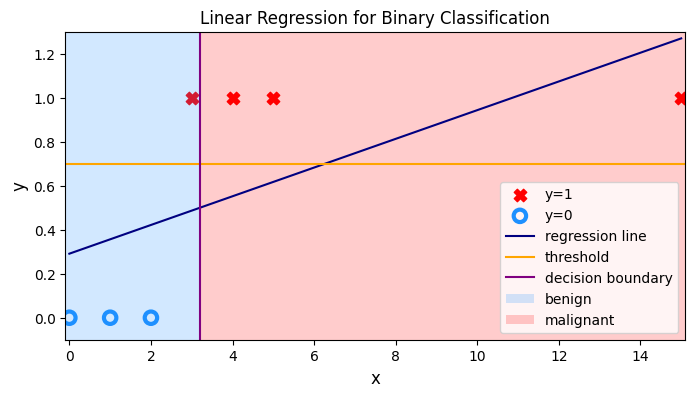

In [26]:
# plot data points
xmin = -0.1
xmax = 15.1
ymin = -0.1
ymax = 1.3

plt.figure(figsize=(8, 4))
plt.scatter(x_train1_new[pos1_new], y_train1_new[pos1_new],
              marker='X', s=80, c='red', label='y=1')
plt.scatter(x_train1_new[neg1_new], y_train1_new[neg1_new],
            marker='o', s=80, label='y=0', facecolors='none',
            edgecolor='dodgerblue', lw=3)

# plot regression line
regression_line = x_train1_new @ w_out1_new + b_out1_new
plt.plot(x_train1_new, regression_line, c='navy', label='regression line')

# plot threshold
plt.axhline(0.7, c='orange', label='threshold')

# decision boundary
decision_boundary = (0.5 - b_out1_new) / w_out1_new[0]
plt.axvline(decision_boundary, c='purple', label='decision boundary')
plt.fill_betweenx((ymin, ymax),
                  xmin, decision_boundary,
                  facecolor='dodgerblue',
                  alpha=0.2, label='benign')
plt.fill_betweenx((ymin, ymax),
                  decision_boundary, xmax,
                  facecolor='red',
                  alpha=0.2, label='malignant')

plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Linear Regression for Binary Classification')
plt.legend(loc='lower right')

plt.show()